Download attack data from into csv file

In [1]:
from dotenv import load_dotenv
import os
from wandb_download import extract_wandb_runs_to_csv

load_dotenv()  # Load environment variables from .env file
project_name = os.getenv("WANDB_PROJECT")
entity_name = os.getenv("WANDB_ENTITY")
assert project_name, "Please set the WANDB_PROJECT environment variable"
assert entity_name, "Please set the WANDB_ENTITY environment variable"
output_file = "project.csv"

extract_wandb_runs_to_csv(project_name, entity_name, output_file)

In [2]:
import pandas as pd
df = pd.read_csv(output_file)
df.head()

,data_time,_timestamp,pascal_voc/mAP,pascal_voc/AP50,time,_step,_runtime,_wandb.runtime,attack,resume,...,optim_wrapper.clip_grad.norm_type,model.bbox_head.loss_bbox.beta,model.bbox_head.bbox_coder.target_stds,model.bbox_head.bbox_coder.target_means,model.train_cfg.assigner.min_pos_iou,model.train_cfg.assigner.neg_iou_thr,model.train_cfg.assigner.pos_iou_thr,model.train_cfg.assigner.ignore_iof_thr,attack_kwargs.random_start,name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bim_attack,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,libra_rcnn_swin-b_voc0712
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bim_attack,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fsaf_r50_voc0712
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bim_attack,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,atss_r101_voc0712
3,0.00222,1.717228e+09,0.667379,0.667,2.087158,1.0,10396.395844,10396.0,bim_attack,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,libra_rcnn_r101_voc0712
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bim_attack,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,atss_r50_voc0712


Keep interesting columns and observations

In [3]:
df = df.filter(regex="attack|^name$|pascal|State")
df = df[df["pascal_voc/AP50"].notna()]
df.head()

,pascal_voc/mAP,pascal_voc/AP50,attack,attack_kwargs.norm,attack_kwargs.alpha,attack_kwargs.steps,attack_kwargs.epsilon,attack_kwargs.targeted,attack_kwargs.random_start,name
3,0.667379,0.667,bim_attack,inf,2.55,20.0,8,False,NaN,libra_rcnn_r101_voc0712
7,0.222168,0.222,bim_attack,inf,2.55,20.0,8,False,NaN,atss_swin-b_voc0712
9,0.354432,0.354,bim_attack,inf,2.55,20.0,8,False,NaN,free_anchor_swin-b_voc0712
11,0.418834,0.419,bim_attack,inf,2.55,1.0,8,False,NaN,libra_rcnn_swin-b_voc0712
12,0.722098,0.722,bim_attack,inf,2.55,1.0,8,False,NaN,fsaf_r50_voc0712


In [4]:
df.to_csv("project_filtered.csv", index=False)

/pfs/work7/workspace/scratch/ma_jjakubas-team_project_fss2024/miniconda3/envs/benchmark/lib/python3.10/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/pfs/work7/workspace/scratch/ma_jjakubas-team_project_fss2024/miniconda3/envs/benchmark/lib/python3.10/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/pfs/work7/workspace/scratch/ma_jjakubas-team_project_fss2024/miniconda3/envs/benchmark/lib/python3.10/site-packages/plotnine/geoms/geom.py:289: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future vers

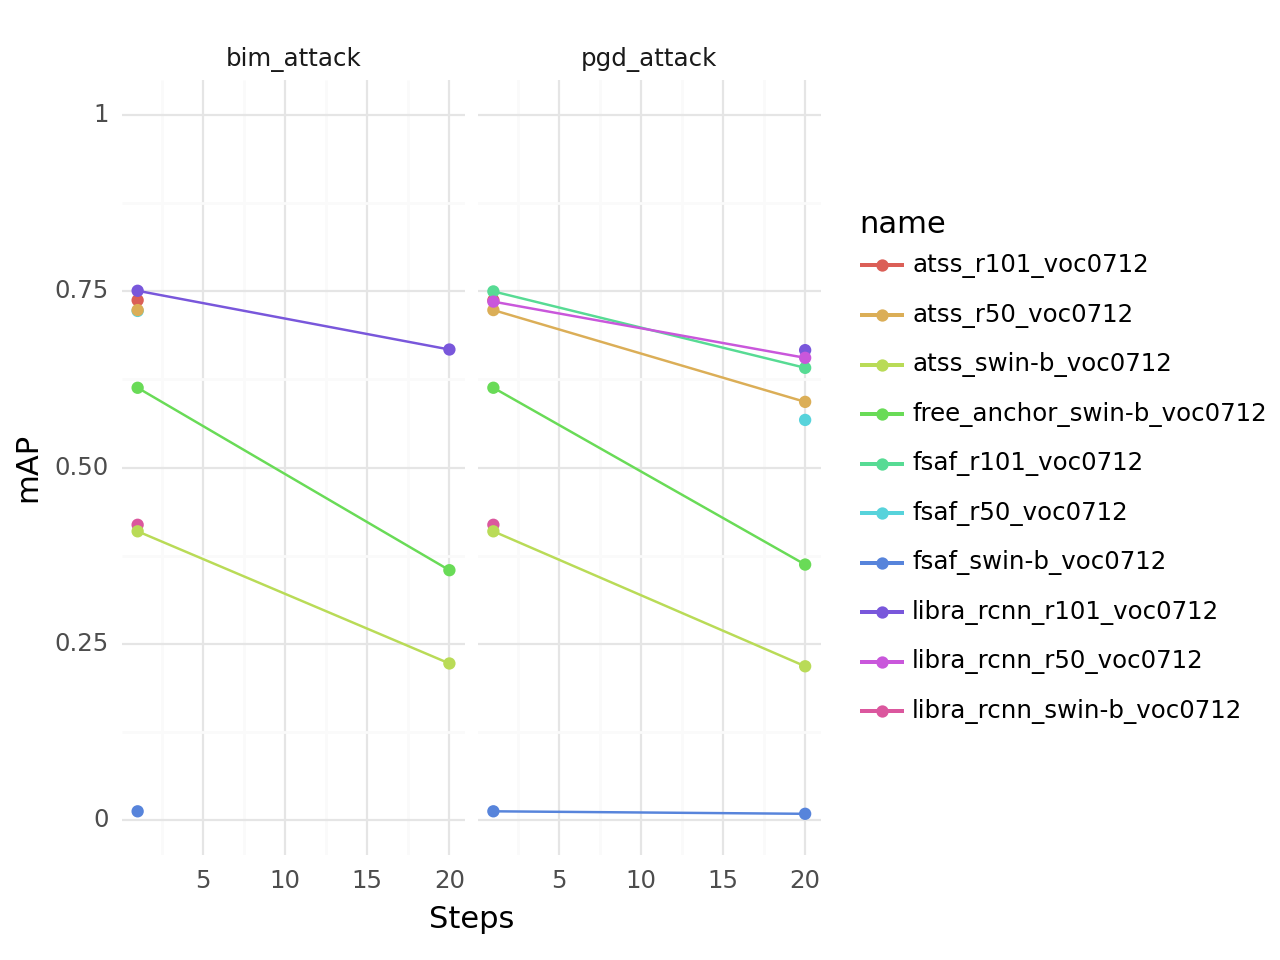

<Figure Size: (640 x 480)>

In [5]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal, facet_wrap, scale_y_continuous

df_filtered = df[df['attack_kwargs.alpha'] > 2]
df_filtered = df_filtered[['pascal_voc/mAP', 'attack_kwargs.steps', 'name', 'attack']].dropna()

plot = (ggplot(df_filtered, aes(x='attack_kwargs.steps', y='pascal_voc/mAP', color='name'))
        + geom_line()
        + geom_point()
        + labs(x='Steps',
               y='mAP')
        + theme_minimal()
        + facet_wrap('~attack')
        + scale_y_continuous(limits=(0, 1)))

plot